In [1]:
# Import packages
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpl_patches

In [2]:
# Load teams file
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)
# Load players file
players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [3]:
# Get team ID based on team name
def get_team_id(team):
  for team in teams:
    if team['teamName'] == team:
      return team['teamId']
  return -1
# Get player ID based on player name
def get_player_id(first, last):
  for player in players:
    if player['firstName'] == first and player['lastName'] == last:
      return player['playerId']
  return -1

In [4]:
# Get the team ID number for the Knicks
get_team_id('New York Knicks')

-1

In [5]:
# Get the player ID number for Tyrese Maxey
get_player_id('Tyrese', 'Maxey')

1630178

In [6]:
# Create JSON request
shot_json = shotchartdetail.ShotChartDetail(
            team_id = 1610612755,
            player_id = get_player_id('Tyrese', 'Maxey'),
            context_measure_simple = 'PTS',
            season_nullable = '2020-21',
            season_type_all_star = 'Regular Season')

In [7]:
# Load data into a Python dictionary
shot_data = json.loads(shot_json.get_json())

In [8]:
# Get the relevant data from our dictionary
relevant_data = shot_data['resultSets'][0]

In [9]:
# Get the headers and row data
headers = relevant_data['headers']
rows = relevant_data['rowSet']

In [10]:
# Create pandas DataFrame
maxey_data = pd.DataFrame(rows)
maxey_data.columns = headers

In [11]:
headers

['GRID_TYPE',
 'GAME_ID',
 'GAME_EVENT_ID',
 'PLAYER_ID',
 'PLAYER_NAME',
 'TEAM_ID',
 'TEAM_NAME',
 'PERIOD',
 'MINUTES_REMAINING',
 'SECONDS_REMAINING',
 'EVENT_TYPE',
 'ACTION_TYPE',
 'SHOT_TYPE',
 'SHOT_ZONE_BASIC',
 'SHOT_ZONE_AREA',
 'SHOT_ZONE_RANGE',
 'SHOT_DISTANCE',
 'LOC_X',
 'LOC_Y',
 'SHOT_ATTEMPTED_FLAG',
 'SHOT_MADE_FLAG',
 'GAME_DATE',
 'HTM',
 'VTM']

In [12]:
maxey_data.head(5)

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022000013,143,1630178,Tyrese Maxey,1610612755,Philadelphia 76ers,1,0,35,...,Center(C),Less Than 8 ft.,3,39,6,1,1,20201223,PHI,WAS
1,Shot Chart Detail,0022000013,179,1630178,Tyrese Maxey,1610612755,Philadelphia 76ers,2,10,4,...,Center(C),Less Than 8 ft.,0,2,-7,1,1,20201223,PHI,WAS
2,Shot Chart Detail,0022000013,191,1630178,Tyrese Maxey,1610612755,Philadelphia 76ers,2,8,50,...,Center(C),Less Than 8 ft.,3,29,-10,1,1,20201223,PHI,WAS
3,Shot Chart Detail,0022000025,217,1630178,Tyrese Maxey,1610612755,Philadelphia 76ers,2,7,54,...,Center(C),Less Than 8 ft.,1,-10,9,1,1,20201226,NYK,PHI
4,Shot Chart Detail,0022000035,492,1630178,Tyrese Maxey,1610612755,Philadelphia 76ers,3,4,21,...,Center(C),Less Than 8 ft.,1,8,6,1,1,20201227,CLE,PHI


In [13]:
maxey_data['ACTION_TYPE'].unique()

array(['Driving Finger Roll Layup Shot', 'Cutting Layup Shot',
       'Driving Layup Shot', 'Pullup Jump shot',
       'Driving Floating Jump Shot', 'Running Layup Shot', 'Jump Shot',
       'Running Dunk Shot', 'Running Pull-Up Jump Shot',
       'Floating Jump shot', 'Fadeaway Jump Shot', 'Turnaround Jump Shot',
       'Layup Shot', 'Driving Floating Bank Jump Shot',
       'Running Alley Oop Layup Shot', 'Driving Hook Shot',
       'Running Finger Roll Layup Shot', 'Step Back Jump shot',
       'Driving Reverse Layup Shot', 'Tip Layup Shot',
       'Running Reverse Layup Shot', 'Jump Bank Shot',
       'Turnaround Fadeaway shot', 'Driving Dunk Shot',
       'Turnaround Hook Shot', 'Running Jump Shot'], dtype=object)

In [14]:
def create_court(ax, color):
    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)

    # 3PT Arc
    ax.add_artist(mpl_patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
    
    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl_patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    # Rim
    ax.add_artist(mpl_patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
    
    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

    # General plot parameters
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.size'] = 18
    plt.rcParams['axes.linewidth'] = 2
    
    return ax

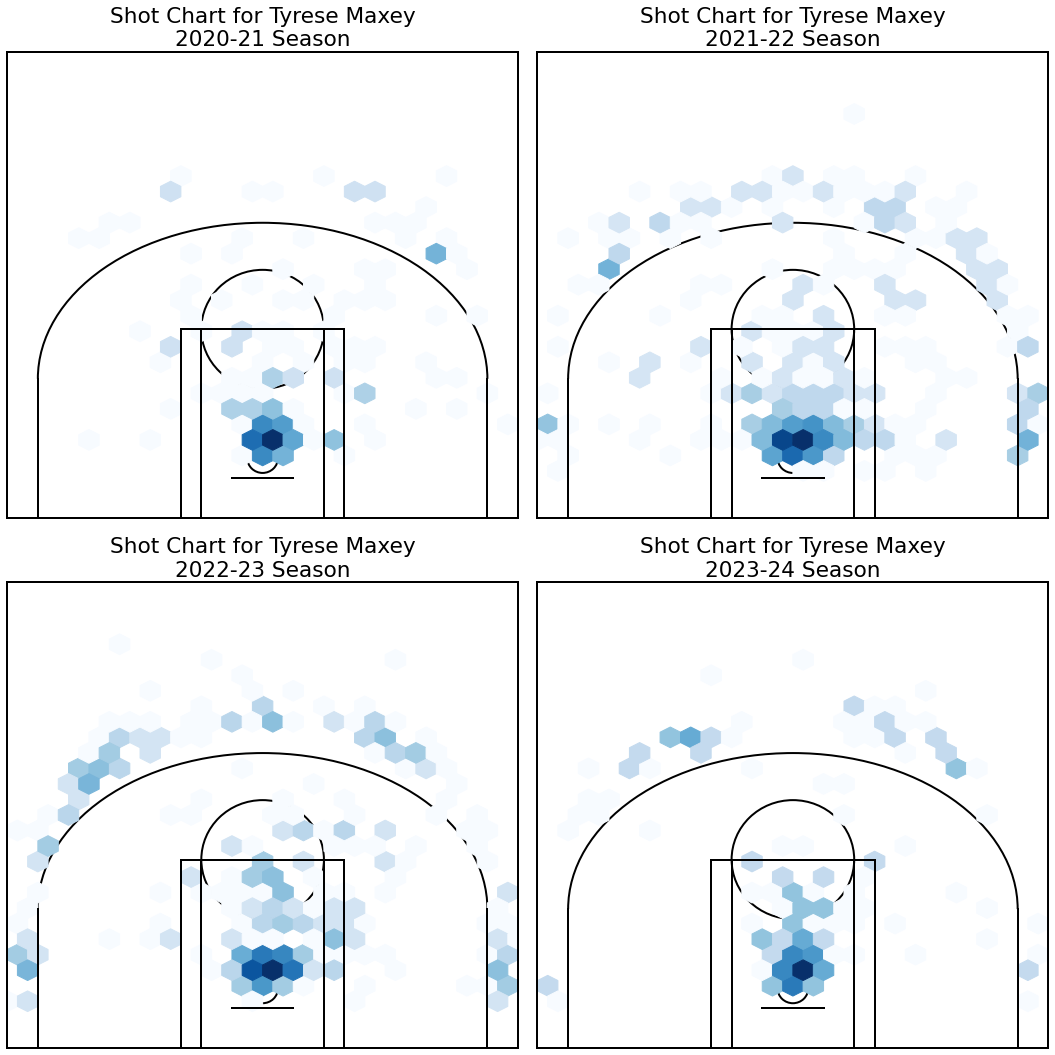

In [26]:
# Define the seasons
seasons = ['2020-21', '2021-22', '2022-23', '2023-24']

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 15))

# Loop through the seasons and create shot charts
for i, season in enumerate(seasons):
    # Create JSON request
    shot_json = shotchartdetail.ShotChartDetail(
        team_id=1610612755,  # Philadelphia 76ers team ID
        player_id=get_player_id('Tyrese', 'Maxey'),
        context_measure_simple='PTS',
        season_nullable=season,
        season_type_all_star='Regular Season'
    )

    # Load data into a Python dictionary
    shot_data = json.loads(shot_json.get_json())

    # Get the relevant data from our dictionary
    relevant_data = shot_data['resultSets'][0]

    # Get the headers and row data
    headers = relevant_data['headers']
    rows = relevant_data['rowSet']

    # Create pandas DataFrame
    maxey_data = pd.DataFrame(rows)
    maxey_data.columns = headers

    # Create the subplot on the grid
    row, col = i // 2, i % 2
    ax = axes[row, col]
    ax = create_court(ax, 'black')
    ax.hexbin(maxey_data['LOC_X'], maxey_data['LOC_Y'] + 70, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')
    ax.set_title(f'Shot Chart for Tyrese Maxey\n{season} Season')
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of shot charts
plt.show()

- Since his rookie year in a similar number of games Maxey's progression from outside the arc is evident especially on the left side
- Maxey doesn't have much of a mid-range presence
- Maxey scores most his points from inside the paint